# Generador de v.a. aleatorias continuas, pruebas con distribución webull.

Se generan n números aleatorios que representan probabilidades siguiendo una distribución uniforme, y utilizando la función inversa de la distribución webull para calcular una aproximación  de la función de densidad de la misma.


Función inversa:

$$ F^{-1}(p;k,\lambda) = \lambda {(-\ln(1-p))}^{1/k} $$

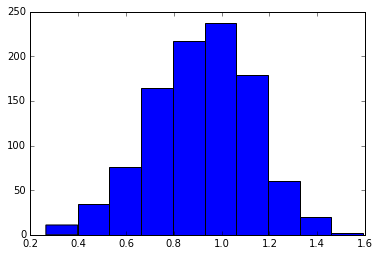

In [1]:
#Funcion de distribucion weibull con k>0 parametro de form, y (lambda) l>0 como parametro de escala
#n=cantidad de numeros aleatorios
#q=valor maximo para el rango de la funcion de distribucion weibull [0,q]
# -- coding: utf-8 --
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import math
%matplotlib inline 

def borland(n):
    x0 = int(datetime.datetime.now().strftime("%f"))
    a=22695477
    b=1
    m=2**32
    num = []
    for i in range(0,n):
        xi = ((a*x0)+(b))%m
        num.append(float(xi)/float(m))
        x0=xi
    return num

l=1
k=5
n=1000
q=2
x = borland(n)
inv = []
for i in x:
    inv.append(float(l)*(-np.log(1.0-i))**(1.0/k))
plt.hist(inv)
plt.show()

Los resultados se comparan con la función de densidad de la distribución webull

$$ f(x;\lambda,k) =  \begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0\\
0 & x<0\end{cases} $$

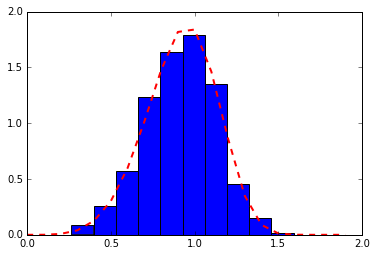

In [2]:
x1 = np.arange(0,q,0.1)
weibull = []
for i in x1:
    euler = np.e**(-(float(i)/l)**k)
    kl = (float(k)/float(l))*(float(i)/l)**(k-1)
    weibull.append(kl*euler)
plt.plot(x1,weibull, color="red",linestyle='--',lw=2 )
plt.hist(inv, normed=True)
#plt.plot(exp)
plt.show()